# Моделирование процесса закачки воды с растворенными жидкими компонентами в нефтенасыщенный пласт

## Теория

### МСС

#### Уравнения неразрывности

$$
\frac{\partial \rho}{\partial t} + \nabla \cdot (\rho \vec{v}) = 0
$$

Для воды:
$$
\frac{\partial}{\partial t} \left[ \rho_w S \phi (1-c_1-c_2-...) \right] + \nabla \cdot \left[ \rho_w (1-c_1-c_2-...) \vec{W}_w \right] = 0
$$

Для компонентов растворенных в воде:
$$
\begin{gathered}
\frac{\partial}{\partial t} \left[ \rho_{c_1} S c_1 \phi \right] + \nabla \cdot \left[ \rho_{c_1} c_1 \vec{W}_w \right] = 0
\\
\frac{\partial}{\partial t} \left[ \rho_{c_2} S c_2 \phi \right] + \nabla \cdot \left[ \rho_{c_2} c_2 \vec{W}_w \right] = 0
\\
\dots
\end{gathered}
$$

Для нефти:
$$
\frac{\partial}{\partial t} \left[ \rho_{o} (1-S) \phi \right] + \nabla \cdot \left[ \rho_{o} \vec{W}_o \right] = 0
$$

Пусть жидкости несжимаемы, тогда:
$$
\begin{gathered}
\frac{\partial}{\partial t} \left[ S (1-c_1-c_2-...) \right] + \frac{1}{\phi} \nabla \cdot \left[ (1-c_1-c_2-...) \vec{W}_w \right] = 0
\\
\frac{\partial}{\partial t} \left[ S c_1 \right] + \frac{1}{\phi} \nabla \cdot \left[c_1 \vec{W}_w \right] = 0
\\
\frac{\partial}{\partial t} \left[ S c_2 \right] + \frac{1}{\phi} \nabla \cdot \left[c_2 \vec{W}_w \right] = 0
\\
\dots
\\
\frac{\partial S}{\partial t} - \frac{1}{\phi} \nabla \cdot \vec{W}_o = 0
\end{gathered}
$$

Складывая уравнения для воды и компонент, получим:
$$
\frac{\partial S}{\partial t} + \frac{1}{\phi} \nabla \cdot \vec{W}_w = 0
$$

Складывая с уравнением для нефти получим:
$$
\nabla \cdot (\vec{W}_w + \vec{W}_o) = 0
$$

Из з. Дарси:

$$
\vec{W}_o = \frac{\mu_w k_o}{\mu_o k_w} \vec{W}_w
$$

Подставляя в уравнение выше получим:
$$
\nabla \cdot \left(\vec{W}_w \left(1 + \frac{\mu_w k_o}{\mu_o k_w} \right)\right) = 0
$$

Пусть
$$
\frac{1}{b} = 1 + \frac{\mu_w k_o}{\mu_o k_w}
$$

Тогда
$$
\nabla \cdot \vec{W}  = 0
$$

$$
\vec{W}_w = \vec{W} b \hspace{1cm} \vec{W}_o = \vec{W} (1 - b)
$$

Таким образом получим систему:
$$
\begin{gathered}
\frac{\partial S}{\partial t} + \frac{\vec{W}}{\phi} \cdot \nabla{b} = 0
\\
\frac{\partial (S c_1)}{\partial t} + \frac{\vec{W}}{\phi} \cdot \nabla{(c_1 b)} = 0
\\
\frac{\partial (S c_2)}{\partial t} + \frac{\vec{W}}{\phi} \cdot \nabla{(c_2 b)} = 0
\\
\dots
\end{gathered}
$$

Для одномерного линейного случая получим:

$$
\begin{gathered}
\frac{\partial S}{\partial t} + \frac{W}{\phi} \frac{\partial b}{\partial x} = 0
\\
\frac{\partial (S c_1)}{\partial t} + \frac{W}{\phi} \frac{\partial c_1 b}{\partial x} = 0
\\
\frac{\partial (S c_2)}{\partial t} + \frac{W}{\phi} \frac{\partial c_2 b}{\partial x} = 0
\\
\dots
\end{gathered}
$$

### Дискретизация

First-order upwind scheme:

if $W>0$:
$$
\begin{gathered}
\frac{S^{n+1}_i - S^{n}_i}{\tau} + \frac{W}{\phi} \frac{b^{n}_i - b^{n}_{i-1}}{h} = 0
\\
\frac{S^{n+1}_i c^{n+1}_i - S^{n}_i c^n_i}{\tau} + \frac{W}{\phi} \frac{c^{n}_i b^{n}_i - c^{n}_{i-1} b^n_{i-1}}{h} = 0
\end{gathered}
$$

if $W<0$:
$$
\begin{gathered}
\frac{S^{n+1}_i - S^{n}_i}{\tau} + \frac{W}{\phi} \frac{ b^{n}_{i+1} - b^{n}_{i} }{h} = 0
\\
\frac{S^{n+1}_i c^{n+1}_i - S^{n}_i c^n_i}{\tau} + \frac{W}{\phi} \frac{c^{n}_{i+1} b^{n}_{i+1} - c^{n}_{i} b^n_{i}}{h} = 0
\end{gathered}
$$

Second-order upwind scheme:

if $W>0$:
$$
\begin{gathered}
\frac{S^{n+1}_i - S^{n}_i}{\tau} + \frac{W}{\phi} \frac{3b^{n}_i - 4b^{n}_{i-1} + b^n_{i-2}}{h} = 0
\\
\frac{S^{n+1}_i c^{n+1}_i - S^{n}_i c^n_i}{\tau} + \frac{W}{\phi} \frac{3c^{n}_i b^{n}_i - 4 c^{n}_{i-1} b^n_{i-1} + c^{n}_{i-2} b^n_{i-2}}{h} = 0
\end{gathered}
$$

if $W<0$:
$$
\begin{gathered}
\frac{S^{n+1}_i - S^{n}_i}{\tau} + \frac{W}{\phi} \frac{- 3 b^{n}_{i} + 4 b^{n}_{i+1} - b^{n}_{i+2}}{2h} = 0
\\
\frac{S^{n+1}_i c^{n+1}_i - S^{n}_i c^n_i}{\tau} + \frac{W}{\phi} \frac{ - 3c^{n}_i b^{n}_i + 4 c^{n}_{i+1} b^n_{i+1} - c^{n}_{i+2} b^n_{i+2}}{2h} = 0
\end{gathered}
$$

## Реализация

### Импорт библиотек

In [1]:
%load_ext autoreload
%autoreload 2

import sys
if ".." not in sys.path:
    sys.path.insert(0, "..")

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numba
from src.BuckleyLeverett import *

### Входные параметры

In [2]:
EPS = 0.5 # параметр схемной вязкости [0, 1), чем больше - тем сильнее размываются разрывы
# чем меньше - тем сильнее проявляются нефизичные осцилляции

In [3]:
# Геометрия
width = 1
height = 1
length = 100

# Хар-ки породы
permeability = 1 * 10**(-12)
porosity = 0.2

# Хар-ки флюидов
viscosity1 = 1 * 10**(-3)
viscosity2 = 4 * 10**(-3)

# Расход
flow = 10 * 10**(-3)

# Насыщенность
saturation_left = 1 - S_ORW
saturation_initial = S_WIR
conc_left = 0.3

# Кол-во узлов сетки
num_of_grid_points = 1000

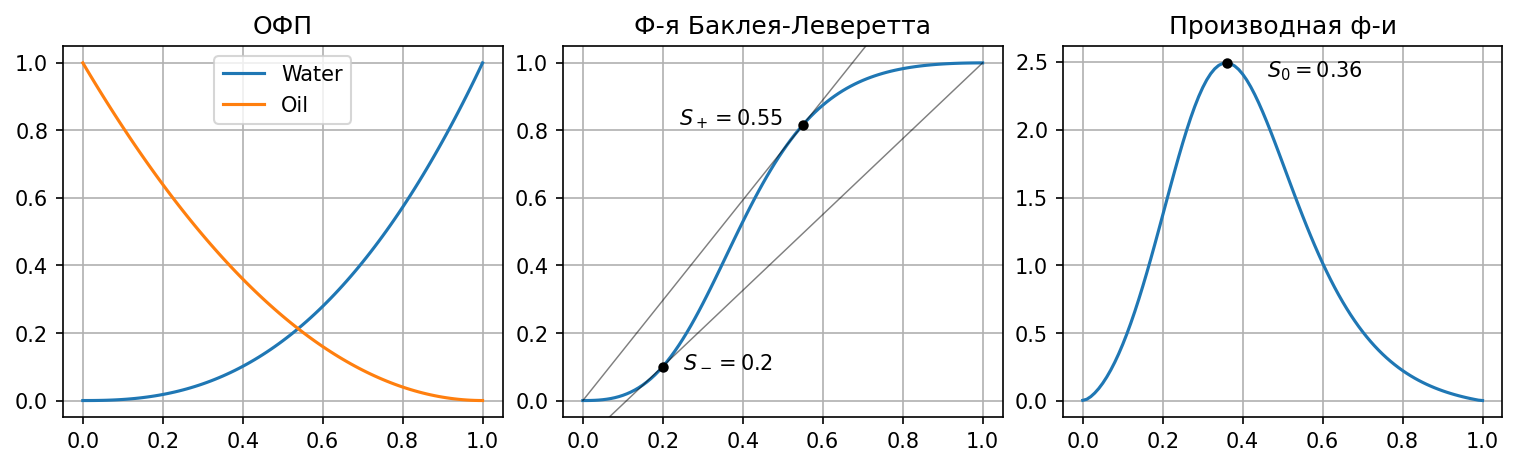

In [4]:
s_right = plot_buckley_leverett(viscosity1, viscosity2, return_Sfront=True, return_dfs=True)

### Инициализация

In [5]:
velocity = flow / (height * width)

x, h = np.linspace(0, length, num_of_grid_points, endpoint=True, retstep=True)

# Время расчета
total_time = length * s_right / b(s_right, viscosity1, viscosity2) / velocity * porosity * 0.9
tau = porosity * h / (2 * velocity) * (1 - EPS)
t = np.arange(0, total_time + tau, tau)
num_of_time_points = t.shape[0]

# W = np.zeros([num_of_time_points, num_of_grid_points])
S = np.zeros([num_of_time_points, num_of_grid_points])
S[0, :] = saturation_initial
S[:, 0] = saturation_left

S2 = np.zeros([num_of_time_points, num_of_grid_points])
S2[0, :] = saturation_initial
S2[:, 0] = saturation_left

conc = np.zeros([num_of_time_points, num_of_grid_points])

#   sin concentration
conc[:, 0] = conc_left + 0.2 * np.sin(t/10)

#   hairbrush concentration
# n_intervals = 10
# for i in range(n_intervals):
#     if i % 2 == 0:
#         conc[len(t)//10*i : len(t)//10*(i+1), 0] = conc_left
#     else:
#         conc[len(t)//10*i : len(t)//10*(i+1), 0] = 0

conc2 = np.zeros([num_of_time_points, num_of_grid_points])
conc2[:, 0] = conc_left

### Вычисления

In [6]:
def upwind_scheme_1st_order(S, Nt, Nl, W, dt, dl, porosity, viscosity1, viscosity2):
    for n in np.arange(0, Nt-1):
        for i in np.arange(1, Nl):
            b0 = b(S[n,i], viscosity1, viscosity2)
            b_ = b(S[n,i-1], viscosity1, viscosity2)

            S[n+1,i] = S[n,i] - W * dt / (porosity * dl) * (b0 - b_)
            
            Sc = S[n,i] * conc[n,i] - W * dt / (porosity * dl) * (conc[n, i] * b0 - conc[n, i-1] * b_)

            if S[n+1, i] != 0:
                conc[n+1,i] = Sc / S[n+1, i]


def upwind_scheme_2nd_order(S2, Nt, Nl, W, dt, dl, porosity, viscosity1, viscosity2):
    for n in np.arange(0, Nt-1):
        b0 = b(S2[n,1], viscosity1, viscosity2)
        b_ = b(S2[n,0], viscosity1, viscosity2)

        S2[n+1,1] = S2[n,1] - W * dt / (porosity * dl) * (b0 - b_)

        for i in np.arange(2, Nl):
            b0 = b(S2[n,i], viscosity1, viscosity2)
            b_ = b(S2[n,i-1], viscosity1, viscosity2)
            b__ = b(S2[n,i-2], viscosity1, viscosity2)

            S2[n+1,i] = S2[n,i] - W * dt / (porosity * 2 * dl) * (3*b0 - 4*b_ + b__)

            # ограничитель
            if S2[n+1, i] < 0:
                S2[n+1,i] = S2[n,i] - W * dt / (porosity * dl) * (b0 - b_)
            
            # Sc = S[n,i] * conc[n,i] - W * dt / (porosity * dl) * (conc[n, i] * b0 - conc[n, i-1] * b_)

            # if S[n+1, i] != 0:
            #     conc[n+1,i] = Sc / S[n+1, i]

In [7]:
upwind_scheme_1st_order(S, num_of_time_points, num_of_grid_points, velocity, tau, h, porosity, viscosity1, viscosity2)

In [8]:
upwind_scheme_2nd_order(S2, num_of_time_points, num_of_grid_points, velocity, tau, h, porosity, viscosity1, viscosity2)

### Точное решение

In [9]:
# xx, s = solve_exact(viscosity1, viscosity2, velocity, porosity, t, ds=0.001)

### Визуализация

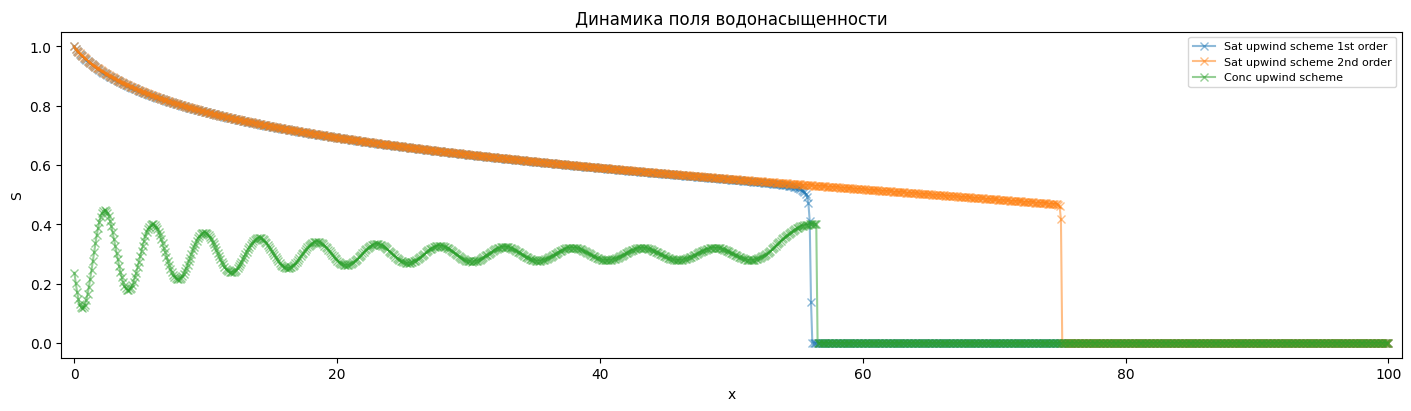

In [10]:
show = 1500

fig, ax = plt.subplots(figsize=(14, 4), layout='constrained', dpi=100)

ax.plot(x, S[show], label="Sat upwind scheme 1st order", marker="x", alpha=0.5)
ax.plot(x, S2[show], label="Sat upwind scheme 2nd order", marker="x", alpha=0.5)


ax.plot(x, conc[show], label="Conc upwind scheme", marker="x", alpha=0.5)
# ax.plot(xx[show], s, label="exact solution", linewidth=0.5, c="black")

plt.title("Динамика поля водонасыщенности")

ax.set_ylabel("S")
ax.set_xlabel("x")
ax.set_ylim([-0.05, 1.05])
ax.set_xlim([-0.01 * length, length * 1.01])
# ax.set_xlim([9.7, 10.2])
plt.legend(fontsize=8)
plt.show()

### Анимация

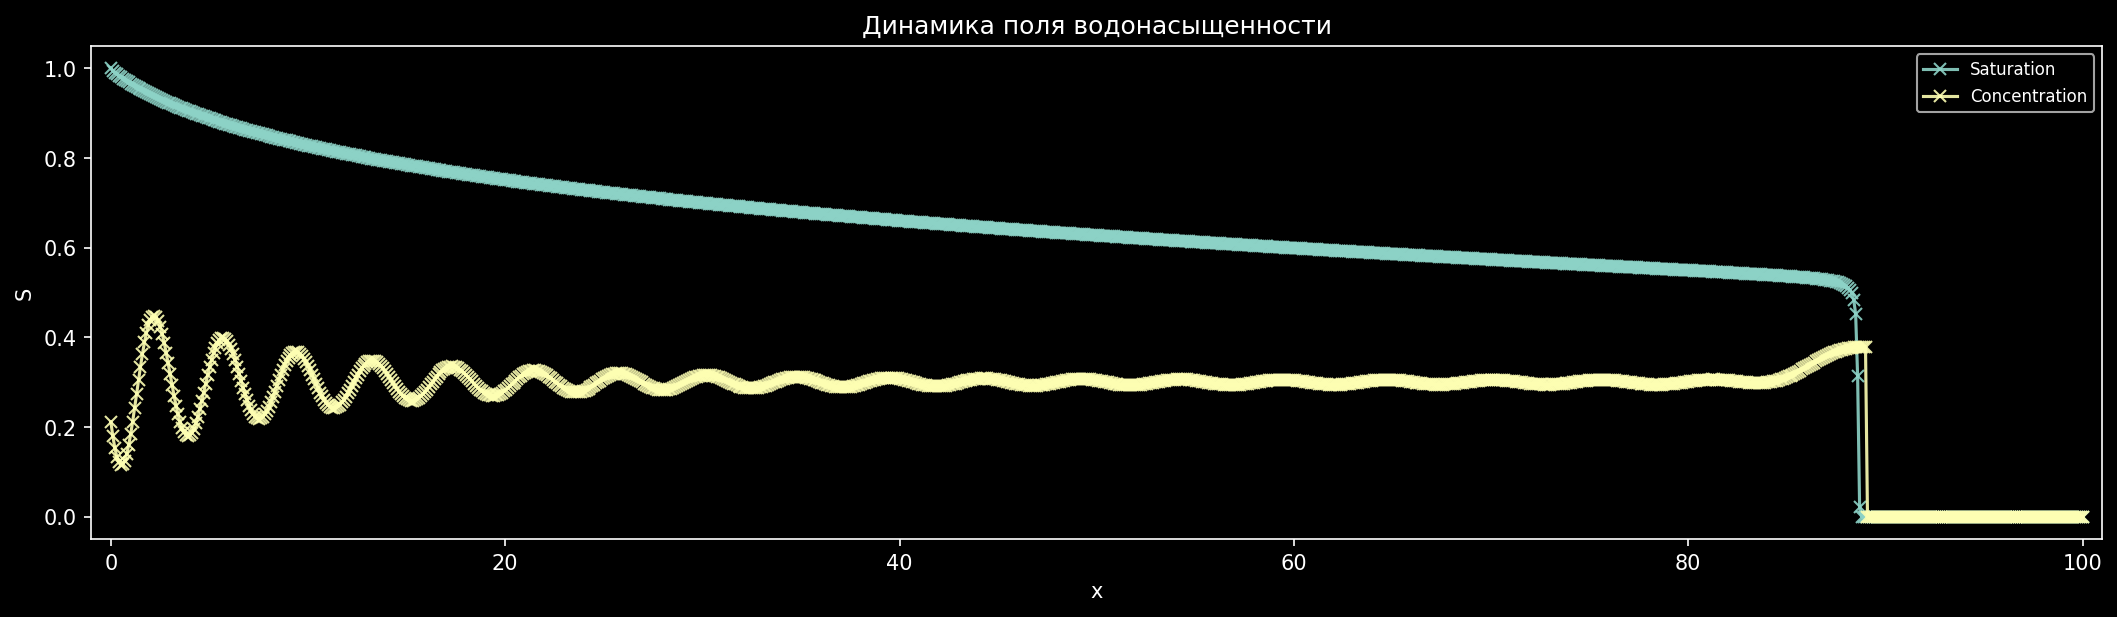

In [11]:
import matplotlib.animation as animation

plt.style.use('dark_background')

n_frames = 100

t_opt = []
conc_opt = []
sat_opt = []
for i in range(S.shape[0]):
    if i % (total_time // tau // (n_frames-1)) == 0:
        t_opt.append(t[i])
        conc_opt.append(conc[i])
        sat_opt.append(S[i])

fig, ax = plt.subplots(figsize=(14, 4), layout='constrained', dpi=150)

sat_line, = ax.plot(x, S[0], label="Saturation", marker="x", alpha=0.9)
conc_line, = ax.plot(x, conc[0], label="Concentration", marker="x", alpha=0.9)

plt.title("Динамика поля водонасыщенности")

ax.set_ylabel("S")
ax.set_xlabel("x")
ax.set_ylim([-0.05, 1.05])
ax.set_xlim([-0.01 * length, length * 1.01])

ax.legend(fontsize=8)

def update(frame):
    # update the line plot:
    conc_line.set_data(x, conc_opt[frame])
    sat_line.set_data(x, sat_opt[frame])
    return conc_line, sat_line

ani = animation.FuncAnimation(fig=fig, func=update, frames=n_frames, interval=0.1, blit=True)
ani.save(filename="../data/periodic_concentration_field.gif", writer="pillow")